Датасет - 3D spatial network

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn import linear_model

In [2]:
data = pd.read_csv('3D_spatial_network.csv')

In [3]:

X = data.iloc[:, 1:3].values  # Используем только LONGITUDE и LATITUDE
y = data.iloc[:, 3].values  # Высота

In [4]:
# Разделение на обучающую и тестовую выборки
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [5]:
# Обучение модели линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_val_pred = lr_model.predict(X_test)
r2_val = r2_score(y_test, y_val_pred)
print(f'Коэффициент детерминации: {r2_val}')

Коэффициент детерминации: 0.030465139920890505


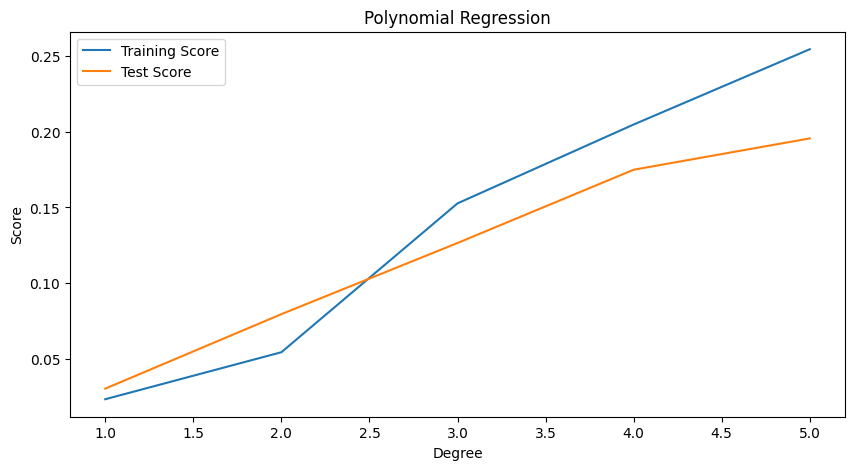

In [7]:
# Построение моделей с полиномиальной функцией различных степеней
degrees = [1, 2, 3, 4, 5]
poly_scores_train = []
poly_scores_test = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    poly_scores_train.append(model.score(X_train_poly, y_train))
    poly_scores_test.append(model.score(X_test_poly, y_test))

plt.figure(figsize=(10, 5))
plt.plot(degrees, poly_scores_train, label='Training Score')
plt.plot(degrees, poly_scores_test, label='Test Score')
plt.xlabel('Degree')
plt.ylabel('Score')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

Лучшее значение параметра alpha: 0.0. Лучшее значение r2: 0.2879860705763426


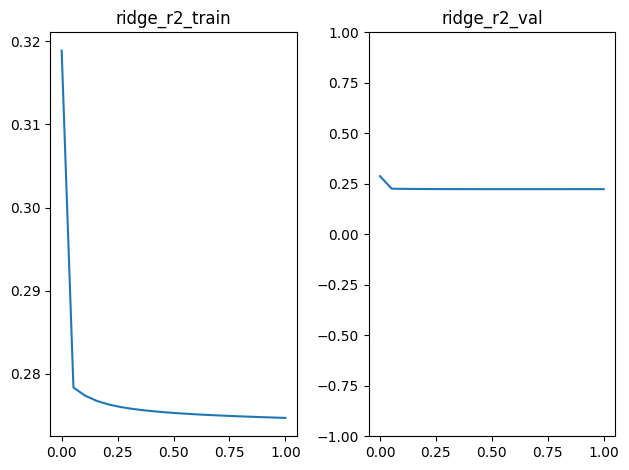

In [8]:
ridge_regression_degree = 8
count_alpha = 20

ridge_r2_train = [0] * count_alpha
ridge_r2_val = [0] * count_alpha

fig, axs = plt.subplots(1, 2)

best_alpha = 0
best_r2_score = -1e20
for id, alpha_factor in enumerate(np.linspace(0, 1, count_alpha)):
    polynomial_features  = PolynomialFeatures(degree=ridge_regression_degree, include_bias=False)
    linear_regression = linear_model.Ridge(alpha=alpha_factor)

    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )

    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)
    y_val_pred = pipeline.predict(X_test)

    ridge_r2_train[id] = r2_score(y_train, y_train_pred)
    ridge_r2_val[id] = r2_score(y_test, y_val_pred)

    if ridge_r2_val[id] >= best_r2_score:
        best_r2_score = ridge_r2_val[id]
        best_alpha = alpha_factor

print(f'Лучшее значение параметра alpha: {best_alpha}. Лучшее значение r2: {best_r2_score}')

axs[0].plot(np.linspace(0, 1, count_alpha), ridge_r2_train)
axs[0].set_title('ridge_r2_train')

axs[1].plot(np.linspace(0, 1, count_alpha), ridge_r2_val)
axs[1].set_title('ridge_r2_val')

plt.ylim(-1, 1)

fig.tight_layout()
plt.show()